## Stack Overflow Ceveloper Survey 2020

December 2011 Stack Overflow launched their Annual User Survey to measure changes in user demographics and trends from the previous year. Stack Overflow have continued to reach out to the developer community to ask them a variety of questions, everything from their favorite technologies to their job preferences. The survey results are published and are available to view here: https://insights.stackoverflow.com/survey

The aim of this project is to explore the data provided by Stack Overflows' developer community.


In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
plt.style.use('ggplot')
import datetime

In [2]:
# Read csv file and specify the parameters: set the index column as respondent
# 64461 rows × 60 columns

sOverflow = pd.read_csv("data/survey_2020.csv", index_col='Respondent')
sOverflow.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
#Filter data
stackO = sOverflow[['DevType','OpSys','YearsCode','YearsCodePro','Country',
                    'Hobbyist','Age','Gender','Ethnicity','Employment',
                    'EdLevel','UndergradMajor','NEWEdImpt','NEWLearn',
                    'LanguageDesireNextYear','LanguageWorkedWith']]
stackO.head()
#64461 rows × 16 columns

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
1,"Developer, desktop or enterprise applications;...",Windows,36,27,Germany,Yes,NaN,Man,White or of European descent,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript
2,"Developer, full-stack;Developer, mobile",MacOS,7,4,United Kingdom,No,NaN,NaN,NaN,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,Python;Swift,JavaScript;Swift
3,NaN,Linux-based,4,NaN,Russian Federation,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,Objective-C;Python;Swift,Objective-C;Python;Swift
4,NaN,Linux-based,7,4,Albania,Yes,25.0,Man,White or of European descent,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,NaN,NaN
5,NaN,Windows,15,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL


In [5]:
stackO_US = stackO.loc[stackO['Country'] == 'United States']
stackO_US.head()
#12469 rows × 16 columns

,DevType,OpSys,YearsCode,YearsCodePro,Country,Hobbyist,Age,Gender,Ethnicity,Employment,EdLevel,UndergradMajor,NEWEdImpt,NEWLearn,LanguageDesireNextYear,LanguageWorkedWith
Respondent,,,,,,,,,,,,,,,,
5,NaN,Windows,15,8,United States,Yes,31.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once a year,Java;Ruby;Scala,HTML/CSS;Ruby;SQL
8,"Developer, back-end;Developer, desktop or ente...",Linux-based,17,13,United States,Yes,36.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Not at all important/not necessary,Once a year,JavaScript,Python;SQL
14,"Developer, desktop or enterprise applications;...",Windows,5,1,United States,Yes,27.0,Man,White or of European descent,Employed full-time,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Somewhat important,Every few months,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript
17,"Developer, full-stack",Windows,7,3,United States,Yes,25.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Fairly important,Once a year,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA
18,"Developer, back-end",Linux-based,19,12,United States,Yes,32.0,Man,White or of European descent,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Very important,Once every few years,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl


In [6]:
stackO_US['Gender'].unique()

array(['Man', 'Woman', nan,
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [55]:
len(stackO_US[stackO_US['Gender']=='nan'])

0

In [46]:
len(stackO_US[stackO_US['Gender']=='Man;Non-binary, genderqueer, or gender non-conforming'])

42

In [43]:
len(stackO_US[stackO_US['Gender']=='Non-binary, genderqueer, or gender non-conforming'])

131

In [44]:
len(stackO_US[stackO_US['Gender']=='Woman;Non-binary, genderqueer, or gender non-conforming'])

46

In [45]:
len(stackO_US[stackO_US['Gender']=='Woman;Man;Non-binary, genderqueer, or gender non-conforming'])

3

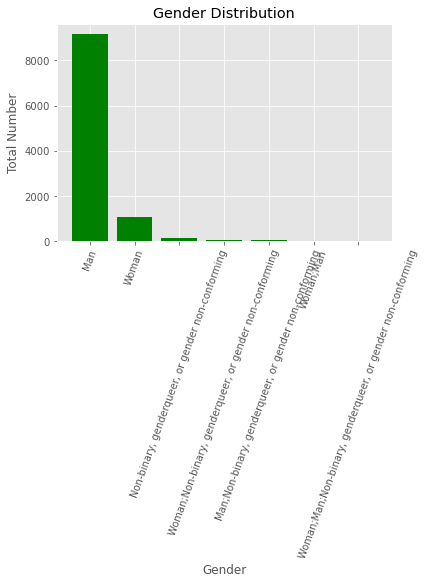

In [40]:
gender_dist = stackO_US["Gender"].value_counts()
# total
x_axis = gender_dist.index
y_axis = gender_dist.values
plt.bar(x_axis,y_axis, color = 'g')
plt.xticks(rotation = 70)
plt.title ('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.show()


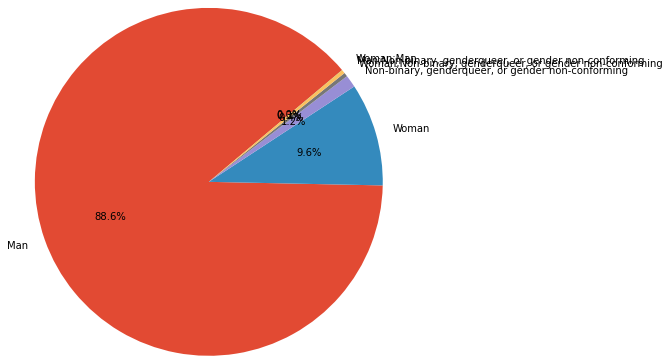

In [57]:
# Generate a pie plot showing the distribution of gender 
gender_dist = stackO_US["Gender"].value_counts()
# dist_mf.values
gender_dist.plot.pie(autopct ='%1.1f%%',radius=2, startangle = 40)